## 1) Floating Away ##

In [1]:
import numpy as np

# part a: making floating variable to full precision

floatVar = .1

print(floatVar) 
print(format(floatVar, '.60f'))

# comparing single and double precision
print('Single: ', format(np.single(.1), '.60f'))
print('Double: ', format(np.double(.1), '.60f'))

# part b: determining roundoff error

diff = .1
while floatVar-diff!=floatVar:
    diff = diff/2

print(diff) 
print(floatVar, floatVar-diff)


0.1
0.100000000000000005551115123125782702118158340454101562500000
Single:  0.100000001490116119384765625000000000000000000000000000000000
Double:  0.100000000000000005551115123125782702118158340454101562500000
5.551115123125783e-18
0.1 0.1


## 2) Integral Processess ##

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


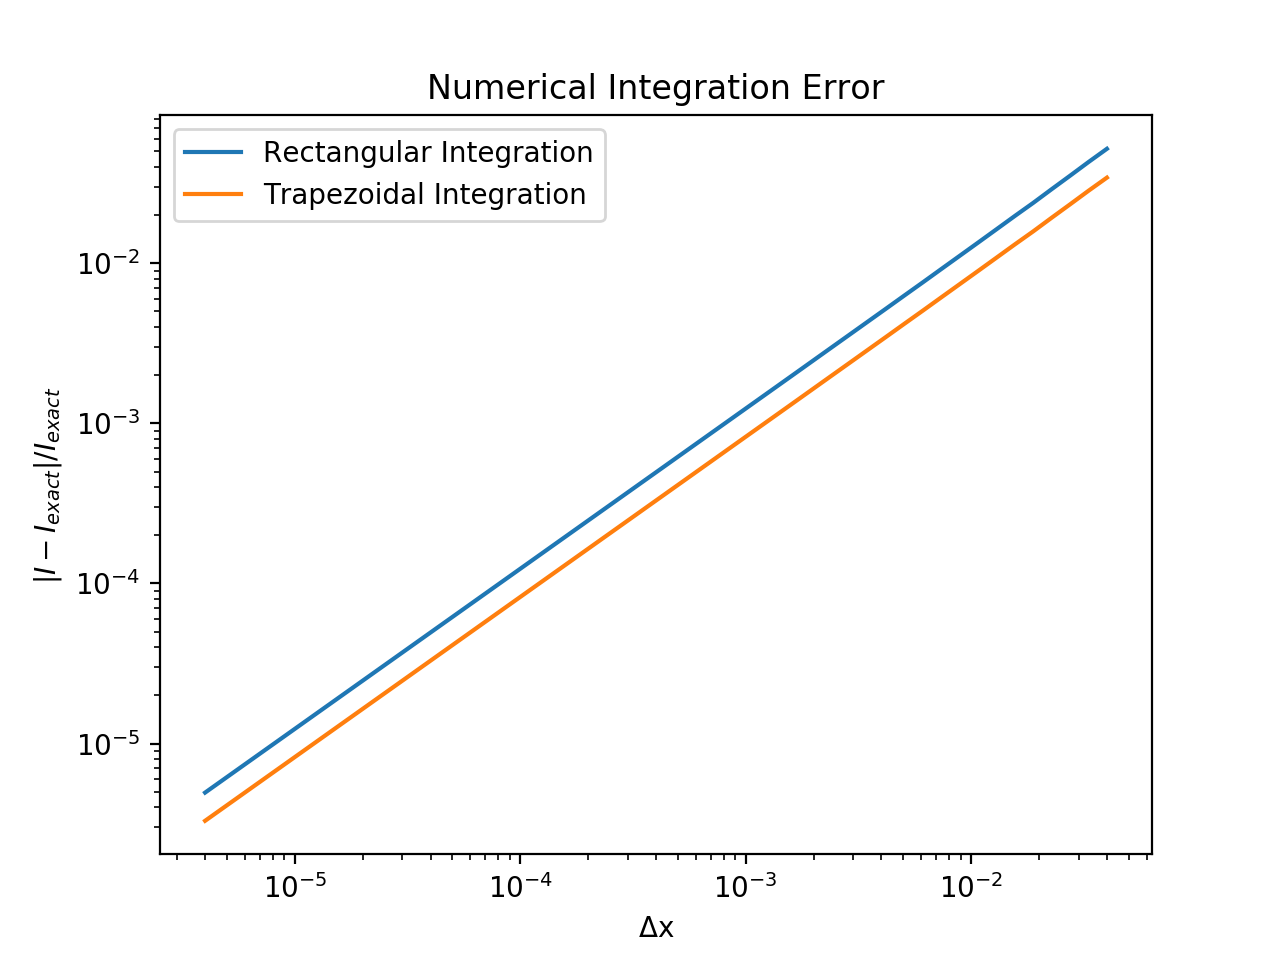

<IPython.core.display.Javascript object>


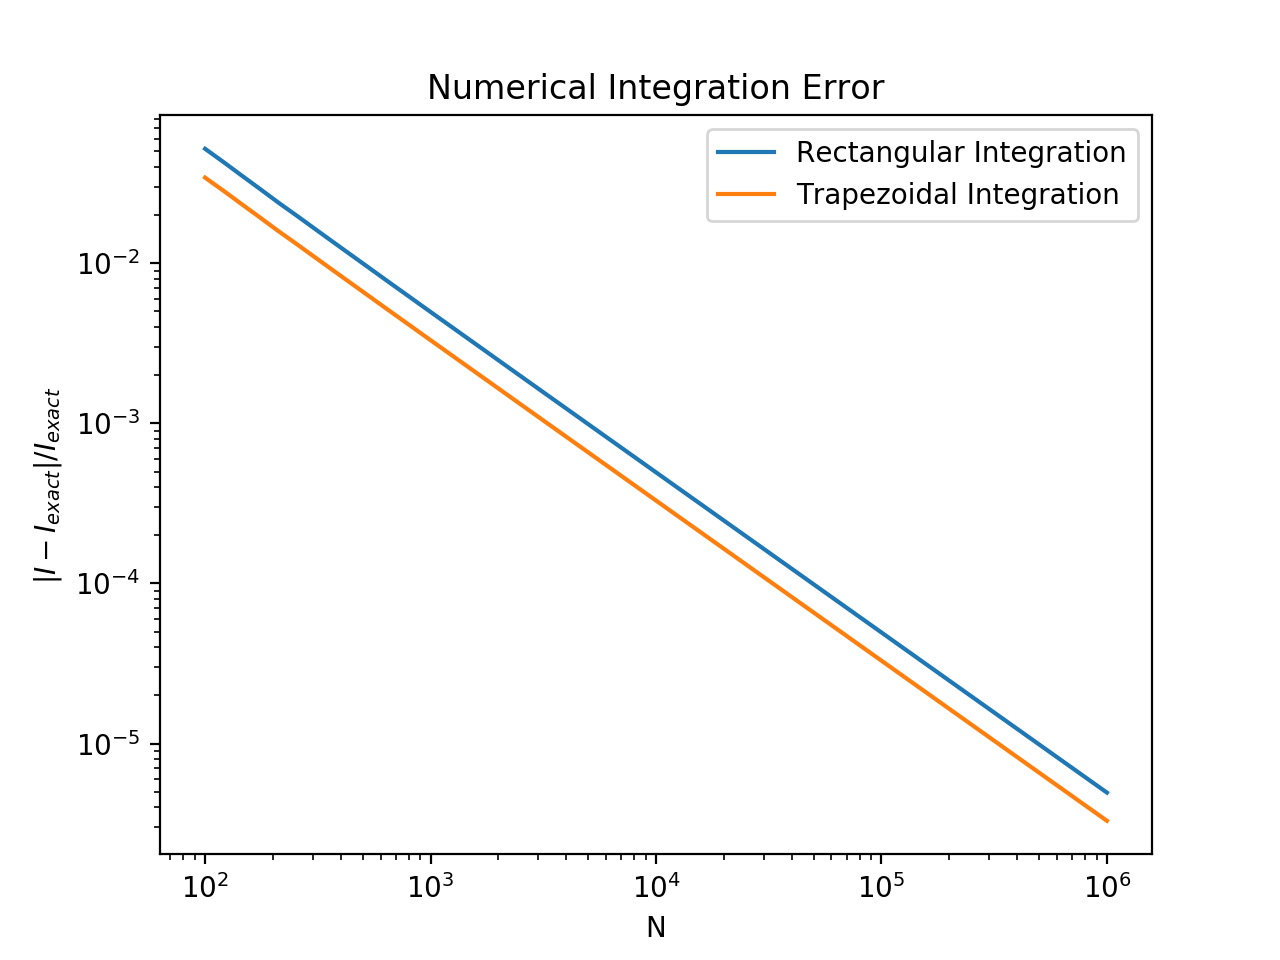

In [8]:
# function of interest
def f(x):
    f = x**(-3/2)
    return f

# exact integral result
I_exact = -2*(5**(-1/2)-1)

# numerical integration method for rectangular & trapezoidal
def integrate(a, b, N):
    del_x = (b-a)/N
    recInt = []
    trapInt = []
    for i in range((N)):
        x_i = a + (i-1)*del_x
        f_xi = f(x_i)
        x_i1 = a + (i)*del_x
        f_xi1 = f(x_i1)
        
        recInt.append(f_xi)
        trapInt.append((f_xi+f_xi1)/2)
    recIntegral = del_x*np.sum(recInt)
    trapIntegral = del_x*np.sum(trapInt)
    return recIntegral, trapIntegral


# part a: testing different delta x values for fractional error
N_tests = np.logspace(2, 6, num = 50)

rec_frac_errs = []
trap_frac_errs = []
del_x = []
for N in N_tests: 
    del_x.append((5-1)/N)
    I_rect, I_trap = integrate(1, 5, int(N))
    rec_frac_err = np.abs(I_rect - I_exact)/I_exact
    rec_frac_errs.append(rec_frac_err)
    trap_frac_err = np.abs(I_trap - I_exact)/I_exact
    trap_frac_errs.append(trap_frac_err)
    
plt.figure()
plt.loglog(del_x, rec_frac_errs, label = "Rectangular Integration")
plt.loglog(del_x, trap_frac_errs, label = "Trapezoidal Integration")
plt.xlabel('$\Delta$x')
plt.ylabel('|$I - I_{exact}$|/$I_{exact}$')
plt.title('Numerical Integration Error')
plt.legend()
#plt.savefig('Ierr_size.png')

plt.figure()
plt.loglog(N_tests, rec_frac_errs, label = "Rectangular Integration")
plt.loglog(N_tests, trap_frac_errs, label = "Trapezoidal Integration")
plt.xlabel('N')
plt.ylabel('|$I - I_{exact}$|/$I_{exact}$')
plt.title('Numerical Integration Error')
plt.legend()
#plt.savefig('Ierr_num.png')

In [4]:
# part b: comparing to scipy.integrate
from scipy import integrate

I_scipy, I_scipyErr, infodict = integrate.quad(f, 1, 5, full_output=1)

scipy_err = np.abs(I_scipy - I_exact)/I_exact
print(I_scipy, scipy_err)
print(I_scipyErr, I_scipyErr/I_exact)



1.1055728090000843 0.0
5.444307667957722e-13 4.924422546970678e-13


In [5]:
infodict

{'neval': 63,
 'last': 2,
 'iord': array([       1,        2, 16777472, 16777472,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,    65537,    65537,    65537,    65537,    65537,
           65537,    65537,    65537,    65537,    65537,    65537,
           65537, 16777472, 16777472, 16777472,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,    65537,    65537,    65537,    65537,
           65537,    65537,    65537,    65537,    65537,    65537,
           65537,    65537], dtype=int32),
 'alist': array([ 1.        ,  3.        , -1.63208486, -1.71575535, -1.80073134,
        -1.88226806, -1.96540482, -2.0483264 , -2.13079486, -2.21318068,
        -2.29594891, -2.3777654 , -2.46004548, -2.54186796, -2.62373991,
        -2.70551445, -2.78740456, -2.8692937 , -2.95104344, -3.03272047,
        -3.11439631, -3.19614928, -3.27783768, -3.35954677, -3.44117675,
     

## 3) Shooting for the Stars ##
### Hogg Cosmology Calculation ###

(3628.473274202829, 3628.4533870238533)


<IPython.core.display.Javascript object>


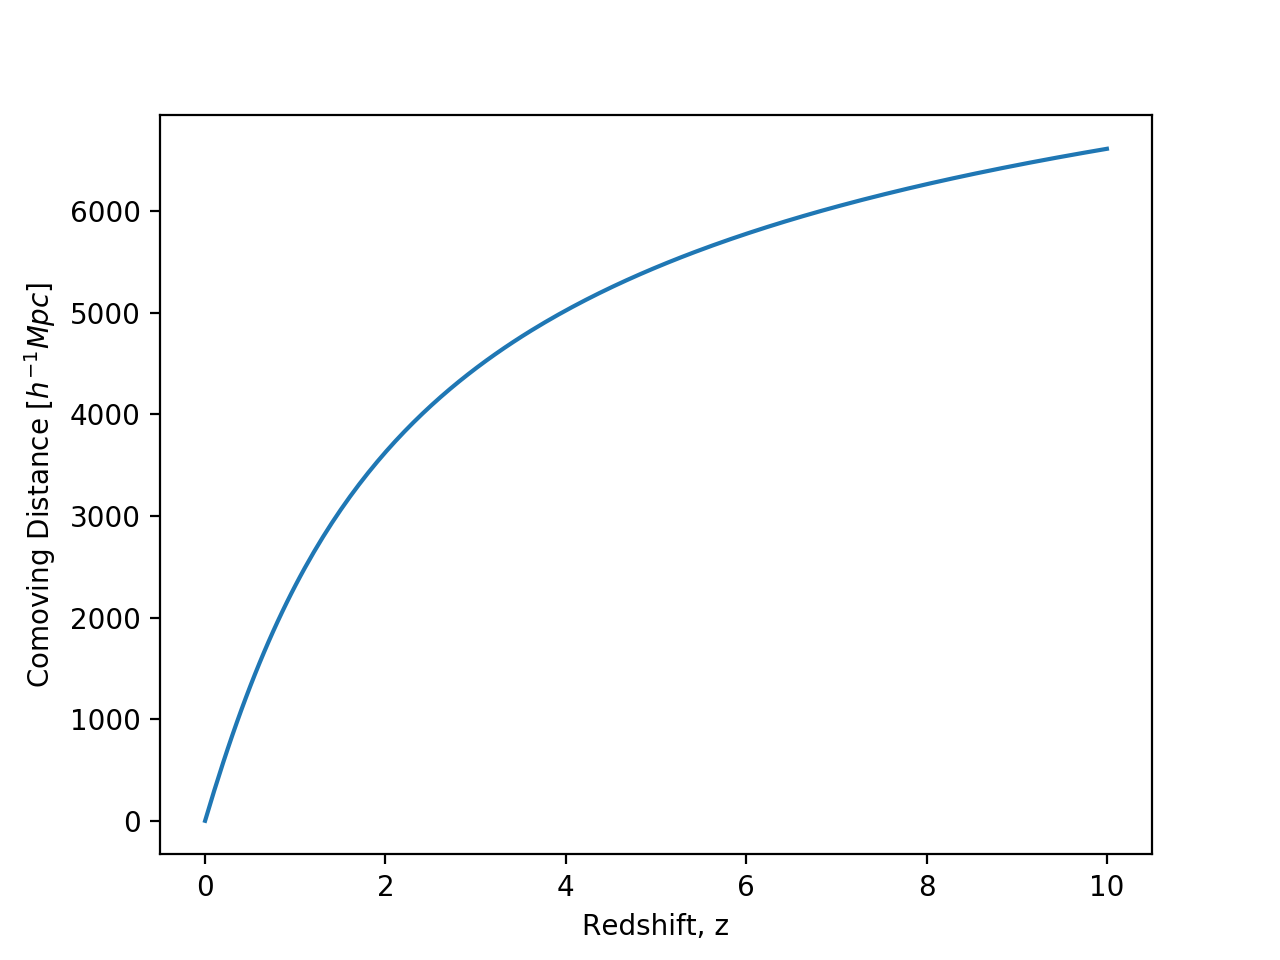

In [9]:
# defining integrand
def Dcdz(z, o_m, o_lambda):
    integrand = 3000*(o_m*(1+z)**3+(1-o_m-o_lambda)*(1+z)**2+o_lambda)**(-1/2)
    return integrand

# given o_m = 0.3 and o_lambda = 0.7
def integrateCosmo(a, b, N):
    del_x = (b-a)/N
    recInt = []
    trapInt = []
    for i in range((N)):
        x_i = a + (i-1)*del_x
        f_xi = Dcdz(x_i, 0.3, 0.7)
        x_i1 = a + (i)*del_x
        f_xi1 = Dcdz(x_i1, 0.3, 0.7)
        
        recInt.append(f_xi)
        trapInt.append((f_xi+f_xi1)/2)
    recIntegral = del_x*np.sum(recInt)
    trapIntegral = del_x*np.sum(trapInt)
    return recIntegral, trapIntegral

# comoving distance when z = 2 with units h^-1 Mpc
Dc = integrateCosmo(0, 2, 100000)
print(Dc)

# plotting comoving distance over z = [0,10]
zs = np.linspace(0,10, num=200)
Dcs = []
for z in zs:
    Dc = integrateCosmo(0, z, 10000)
    Dcs.append(Dc[1])

plt.figure()
plt.plot(zs, Dcs)
plt.xlabel('Redshift, z')
plt.ylabel('Comoving Distance [$h^{-1}Mpc$]')
plt.savefig('comoving_dist.png')